In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib.gridspec import GridSpec
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

### Load the data

In [2]:
flight_data = pd.read_csv('flights_clean.csv')
airport_data = pd.read_csv('airports_clean.csv')
airline_data = pd.read_csv('airlines_clean.csv')
daily_data = pd.read_csv('daily_clean.csv')

In [3]:
airline_list=airline_data["AIRLINE"].unique()
airport_list=airport_data["ORIGIN_AIRPORT"].unique()

### Average Delay at Origin and Destination per airline, then by airport

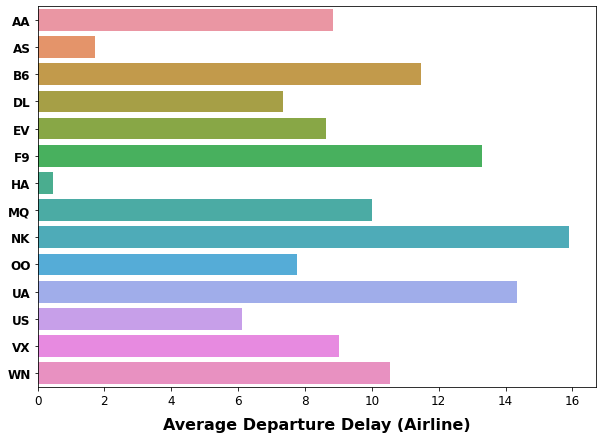

In [4]:
fig = plt.figure(1, figsize=(10,7))
ax = sns.barplot(y="AIRLINE", x='DEPARTURE_DELAY', data=airline_data)
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);
ax.yaxis.label.set_visible(False)
plt.xlabel('Average Departure Delay (Airline)', fontsize=16, weight = 'bold', labelpad=10)
plt.show()

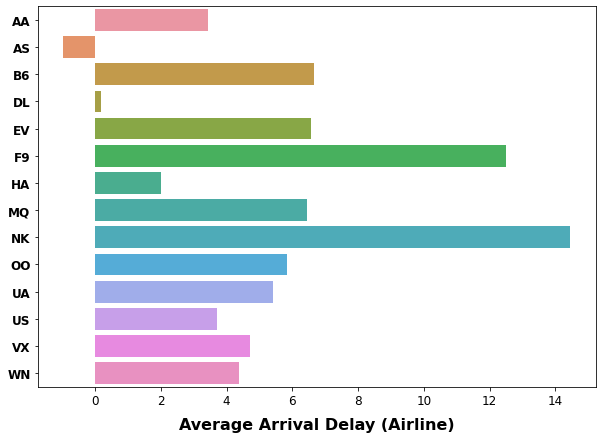

In [5]:
fig = plt.figure(1, figsize=(10,7))
ax = sns.barplot(y="AIRLINE", x='ARRIVAL_DELAY', data=airline_data)
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);
ax.yaxis.label.set_visible(False)
plt.xlabel('Average Arrival Delay (Airline)', fontsize=16, weight = 'bold', labelpad=10)
plt.show()

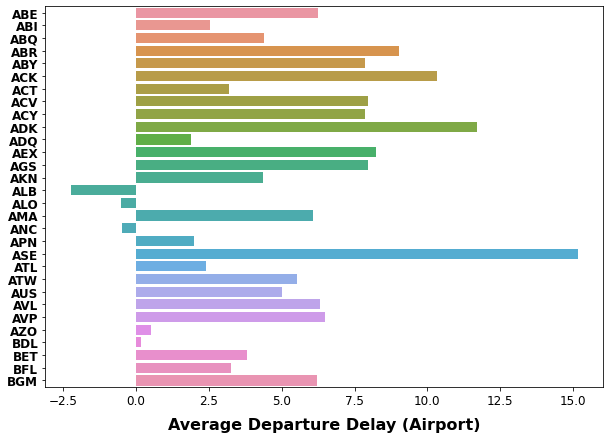

In [6]:
fig = plt.figure(1, figsize=(10,7))
ax = sns.barplot(y="ORIGIN_AIRPORT", x='source_airport_avg_delay', data=airport_data[0:30])
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);
ax.yaxis.label.set_visible(False)
plt.xlabel('Average Departure Delay (Airport)', fontsize=16, weight = 'bold', labelpad=10)
plt.show()

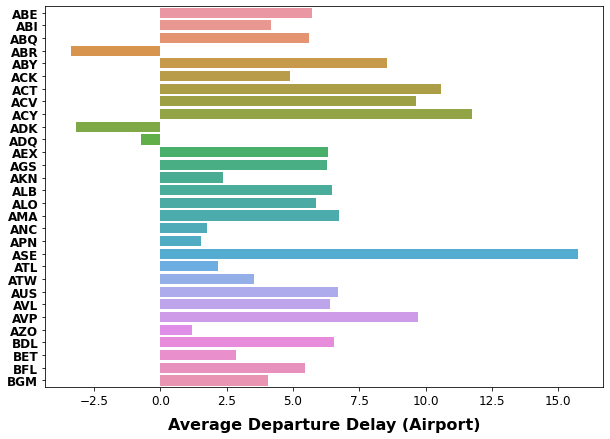

In [7]:
fig = plt.figure(1, figsize=(10,7))
ax = sns.barplot(y="ORIGIN_AIRPORT", x='destination_airport_avg_delay', data=airport_data[0:30])
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);
ax.yaxis.label.set_visible(False)
plt.xlabel('Average Departure Delay (Airport)', fontsize=16, weight = 'bold', labelpad=10)
plt.show()

### Number of flights delayed vs on time per airline/airport

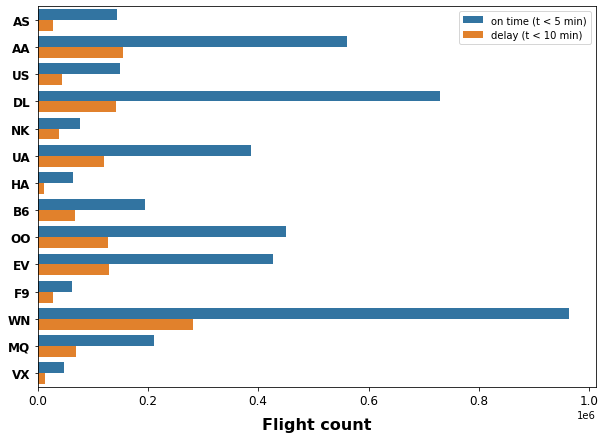

In [6]:

delay_type = lambda x:((0,1)[x > 10],2)
flight_data['Delay_Level'] = flight_data['ARRIVAL_DELAY'].apply(delay_type)
#____________________________________________________
fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y="AIRLINE", hue='Delay_Level', data=flight_data)
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);
ax.yaxis.label.set_visible(False)
plt.xlabel('Flight count', fontsize=16, weight = 'bold', labelpad=10)
#________________
# Set the legend
L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('delay (t < 10 min)')
plt.show()

### Average delay per date

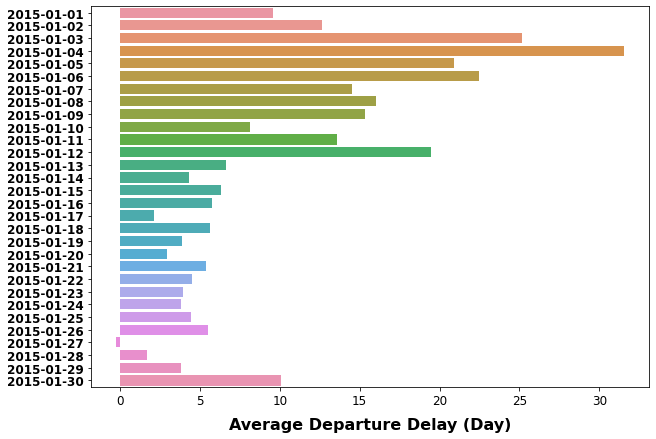

In [21]:
fig = plt.figure(1, figsize=(10,7))
#CHOOSE MONTH
date_range = daily_data[0:31]

ax = sns.barplot(y="DATE", x='average_dep_delay_daily', data=date_range)
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);
ax.yaxis.label.set_visible(False)
plt.xlabel('Average Departure Delay (Day)', fontsize=16, weight = 'bold', labelpad=10)
plt.show()

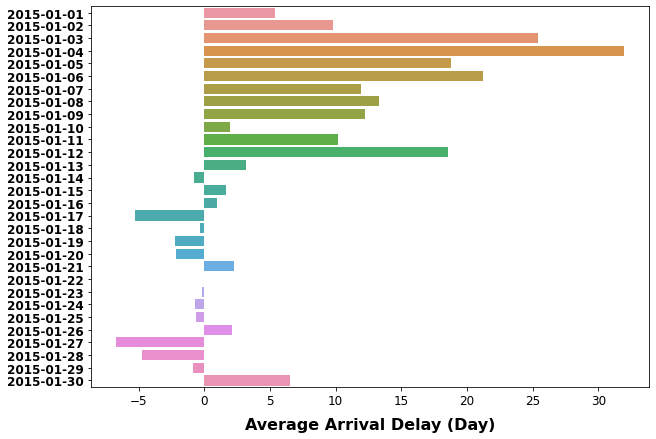

In [22]:
fig = plt.figure(1, figsize=(10,7))
#CHOOSE MONTH
date_range = daily_data[0:31]
ax = sns.barplot(y="DATE", x='average_arr_delay_daily', data=date_range)
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);
ax.yaxis.label.set_visible(False)
plt.xlabel('Average Arrival Delay (Day)', fontsize=16, weight = 'bold', labelpad=10)
plt.show()